**Melakukan Data Preprocessing & Text Preprocessing**

In [1]:
%pip install google-play-scraper pandas Sastrawi nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("traveloka_reviews.csv")

display(df.head())

print("Informasi Data:")
print(df.info())

,userName,content,score,at,replyContent,date,time
0,Pengguna Google,best,5,2026-02-08 19:28:36,Hello! Thank you very much for the positive re...,2026-02-08,19:28:36
1,Pengguna Google,sangat memahami dan membantu mencarikan info m...,5,2026-02-08 19:14:16,"Hai Kak, terima kasih atas feedbacknya. Jika K...",2026-02-08,19:14:16
2,Pengguna Google,terbaik,4,2026-02-08 18:21:23,"Halo Kak, terima kasih banyak atas ratingnya. ...",2026-02-08,18:21:23
3,Pengguna Google,"sangat Membantu saat cari hotel,tiket bus dan ...",5,2026-02-08 17:53:36,"Halo Kak, terima kasih banyak atas ratingnya. ...",2026-02-08,17:53:36
4,Pengguna Google,harga tiket bis dengan beli di agen aslinya be...,1,2026-02-08 16:43:06,"Hai Sulistia, kami mohon maaf atas kekecewaan ...",2026-02-08,16:43:06


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      10000 non-null  object
 1   content       10000 non-null  object
 2   score         10000 non-null  int64 
 3   at            10000 non-null  object
 4   replyContent  9728 non-null   object
 5   date          10000 non-null  object
 6   time          10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None


In [4]:
print("Missing values:")
print(df.isnull().sum())

print("\nJumlah duplicates:")
print(df.duplicated().sum())

Missing values:
userName          0
content           0
score             0
at                0
replyContent    272
date              0
time              0
dtype: int64

Jumlah duplicates:
0


In [5]:
def label_sentiment(score):
    if score >= 4:
        return "positif"
    elif score == 3:
        return "netral"
    else:
        return "negatif"

df['sentiment'] = df['score'].apply(label_sentiment)

print("Distribusi sentimen:")
print(df['sentiment'].value_counts())
display(df[['content', 'score', 'sentiment']].head(10))

Distribusi sentimen:
sentiment
positif    8464
negatif    1303
netral      233
Name: count, dtype: int64


,content,score,sentiment
0,best,5,positif
1,sangat memahami dan membantu mencarikan info m...,5,positif
2,terbaik,4,positif
3,"sangat Membantu saat cari hotel,tiket bus dan ...",5,positif
4,harga tiket bis dengan beli di agen aslinya be...,1,negatif
5,ok,4,positif
6,mantap cepat,5,positif
7,oke,4,positif
8,good,4,positif
9,super app 👍,5,positif


In [ ]:
#Optimized code

import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

# Setup (sekali saja)
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# Pre-compile regex (PENTING)
url_pattern = re.compile(r"http\S+|www\S+|https\S+")
digit_pattern = re.compile(r"\d+")
non_alpha_pattern = re.compile(r"[^a-zA-Z\s]")
multi_space_pattern = re.compile(r"\s+")

translator = str.maketrans('', '', string.punctuation)

def preprocess_text_fast(text):
    text = str(text).lower()
    text = url_pattern.sub('', text)
    text = digit_pattern.sub('', text)
    text = text.translate(translator)
    text = non_alpha_pattern.sub('', text)
    text = multi_space_pattern.sub(' ', text).strip()

    # stopword removal
    words = [w for w in text.split() if w not in stop_words]

    # stemming (kalimat, bukan per kata)
    return stemmer.stem(" ".join(words))

# Gunakan map (sedikit lebih cepat dari apply)
df['clean_content'] = df['content'].map(preprocess_text_fast)

display(df[['content', 'clean_content', 'sentiment']].head(10))


,content,clean_content,sentiment
0,best,best,positif
1,sangat memahami dan membantu mencarikan info m...,paham bantu cari info hotel akomodasi travelling,positif
2,terbaik,baik,positif
3,"sangat Membantu saat cari hotel,tiket bus dan ...",bantu cari hoteltiket bus tiket pesawat,positif
4,harga tiket bis dengan beli di agen aslinya be...,harga tiket bis beli agen asli beda jauhbeda r...,negatif
5,ok,ok,positif
6,mantap cepat,mantap cepat,positif
7,oke,oke,positif
8,good,good,positif
9,super app 👍,super app,positif


In [ ]:
#before optimzation code
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# stop_words = set(stopwords.words('indonesian'))

# def clean_text(text):
#     text = str(text).lower()
#     text = re.sub(r"http\S+|www\S+|https\S+", '', text)
#     text = re.sub(r"\d+", "", text)
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     text = re.sub(r"[^a-zA-Z\s]", "", text)
#     text = re.sub(r"\s+", " ", text).strip()
#     return text

# def remove_stopwords(text):
#     words = text.split()
#     filtered_words = [word for word in words if word not in stop_words]
#     return " ".join(filtered_words)

# def preprocess_text(text):
#     text = clean_text(text)
#     text = remove_stopwords(text)
#     text = stemmer.stem(text)
#     return text

# df['clean_content'] = df['content'].apply(preprocess_text)

# display(df[['content', 'clean_content', 'sentiment']].head(10))

,content,clean_content,sentiment
0,best,best,positif
1,sangat memahami dan membantu mencarikan info m...,paham bantu cari info hotel akomodasi travelling,positif
2,terbaik,baik,positif
3,"sangat Membantu saat cari hotel,tiket bus dan ...",bantu cari hoteltiket bus tiket pesawat,positif
4,harga tiket bis dengan beli di agen aslinya be...,harga tiket bis beli agen asli beda jauhbeda r...,negatif
5,ok,ok,positif
6,mantap cepat,mantap cepat,positif
7,oke,oke,positif
8,good,good,positif
9,super app 👍,super app,positif


In [7]:
df.to_csv("traveloka_cleaned_preprocessed.csv", index=False, encoding='utf-8-sig')
print("Data hasil preprocessing disimpan")

Data hasil preprocessing disimpan


**Melakukan Labelling (Positif, Negatif, Netral)**

In [8]:
def label_sentiment(score):
    if score >= 4:
        return "positif"
    elif score == 3:
        return "netral"
    else:
        return "negatif"

In [9]:
df['sentiment'] = df['score'].apply(label_sentiment)

display(df[['content', 'clean_content', 'score', 'sentiment']].head(10))

,content,clean_content,score,sentiment
0,best,best,5,positif
1,sangat memahami dan membantu mencarikan info m...,paham bantu cari info hotel akomodasi travelling,5,positif
2,terbaik,baik,4,positif
3,"sangat Membantu saat cari hotel,tiket bus dan ...",bantu cari hoteltiket bus tiket pesawat,5,positif
4,harga tiket bis dengan beli di agen aslinya be...,harga tiket bis beli agen asli beda jauhbeda r...,1,negatif
5,ok,ok,4,positif
6,mantap cepat,mantap cepat,5,positif
7,oke,oke,4,positif
8,good,good,4,positif
9,super app 👍,super app,5,positif


In [10]:
jumlah_positif = (df['sentiment'] == 'positif').sum()
jumlah_netral = (df['sentiment'] == 'netral').sum()
jumlah_negatif = (df['sentiment'] == 'negatif').sum()

print("Distribusi Sentimen:")
print(f"Positif : {jumlah_positif} ulasan")
print(f"Netral  : {jumlah_netral} ulasan")
print(f"Negatif : {jumlah_negatif} ulasan")


Distribusi Sentimen:
Positif : 8464 ulasan
Netral  : 233 ulasan
Negatif : 1303 ulasan


**Membuat Visualisasi Menggunakan Histogram dan Pie Chart**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

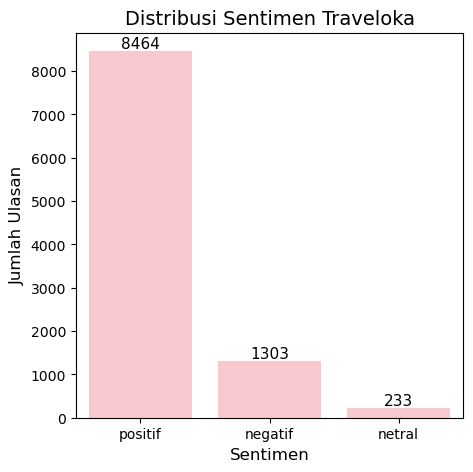

In [13]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(5,5))

sns.countplot(x='sentiment', data=df, color='pink')

plt.title("Distribusi Sentimen Traveloka", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
        textcoords='offset points'
    )
plt.show()

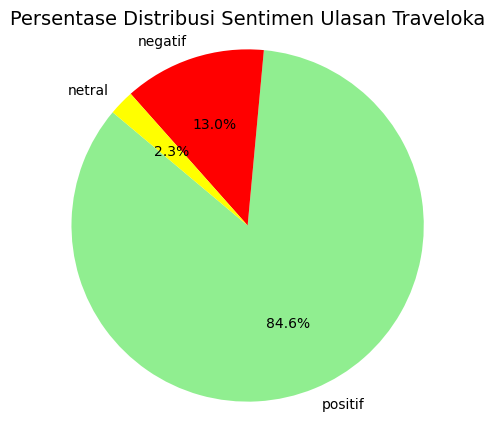

In [14]:
# Visualisasi Pie Chart
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightgreen', 'red', 'yellow']
)

plt.title("Persentase Distribusi Sentimen Ulasan Traveloka", fontsize=14)
plt.axis('equal')
plt.show()

**Membuat Word Cloud**

In [15]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
positif_text = " ".join(df[df['sentiment'] == 'positif']['clean_content'].astype(str))
negatif_text = " ".join(df[df['sentiment'] == 'negatif']['clean_content'].astype(str))
netral_text  = " ".join(df[df['sentiment'] == 'netral']['clean_content'].astype(str))

print("Data siap digunakan untuk Word Cloud")

Data siap digunakan untuk Word Cloud


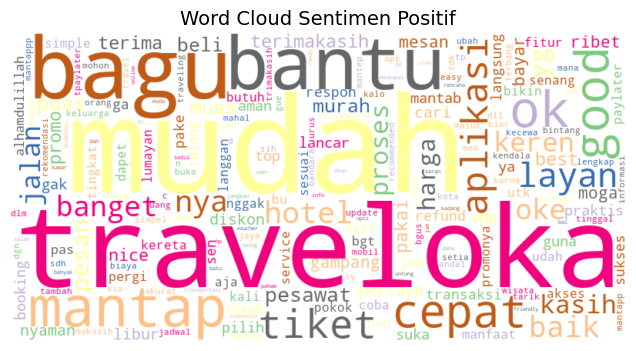

In [18]:
wordcloud_positif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    colormap='Accent_r'
).generate(positif_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif", fontsize=14)
plt.show()

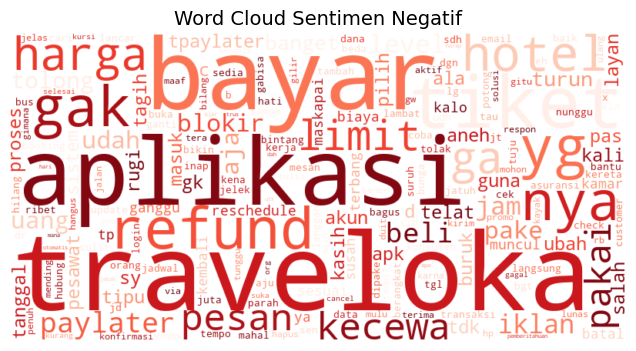

In [19]:
wordcloud_negatif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    colormap='Reds'
).generate(negatif_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Negatif", fontsize=14)
plt.show()

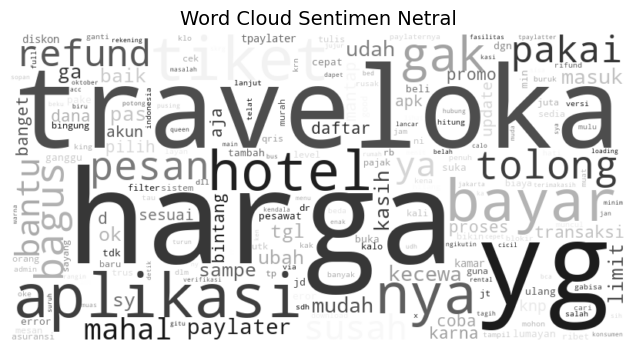

In [20]:
wordcloud_netral = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    colormap='gist_gray'
).generate(netral_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Netral", fontsize=14)
plt.show()

**Melakukan Data Splitting**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df['clean_content']
y = df['sentiment']

print("Jumlah total data:", len(X))
print("Contoh teks:", X.iloc[0])
print("Label:", y.iloc[0])

Jumlah total data: 10000
Contoh teks: best
Label: positif


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data latih :", len(X_train))
print("Jumlah data uji   :", len(X_test))

Jumlah data latih : 8000
Jumlah data uji   : 2000


In [24]:
print("Contoh data latih:")
print(X_train.iloc[0], y_train.iloc[0])

print("Contoh data uji:")
print(X_test.iloc[0], y_test.iloc[0])

Contoh data latih:
bagus positif
Contoh data uji:
kalo book tiket kereta ga ribet tinggal buka traveloka aja pokok dont worry no rugi positif


**Melakukan Training Model Logistic Regression 80/20**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
X = df['clean_content']
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai. Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai. Bentuk data latih: (8000, 4336)


In [27]:
log_model_80_20 = LogisticRegression(max_iter=1000, random_state=42)

log_model_80_20.fit(X_train_tfidf, y_train)

print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


Akurasi model Logistic Regression: 91.85%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.79      0.67      0.73       260
      netral       0.00      0.00      0.00        47
     positif       0.93      0.98      0.96      1693

    accuracy                           0.92      2000
   macro avg       0.57      0.55      0.56      2000
weighted avg       0.89      0.92      0.91      2000



c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


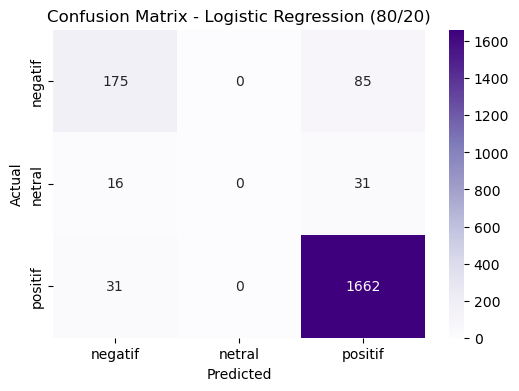

In [28]:
y_pred = log_model_80_20.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Logistic Regression: {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=log_model_80_20.classes_,
            yticklabels=log_model_80_20.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (80/20)")
plt.show()

**Melakukan Training Model Logistic Regression 70/30**

In [29]:
X = df['clean_content']
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai. Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai. Bentuk data latih: (7000, 4053)


In [30]:
log_model_70_30 = LogisticRegression(max_iter=1000, random_state=42)

log_model_70_30.fit(X_train_tfidf, y_train)

print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


Akurasi model Logistic Regression: 91.60%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.79      0.64      0.71       391
      netral       0.00      0.00      0.00        70
     positif       0.93      0.98      0.96      2539

    accuracy                           0.92      3000
   macro avg       0.58      0.54      0.56      3000
weighted avg       0.89      0.92      0.90      3000



c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


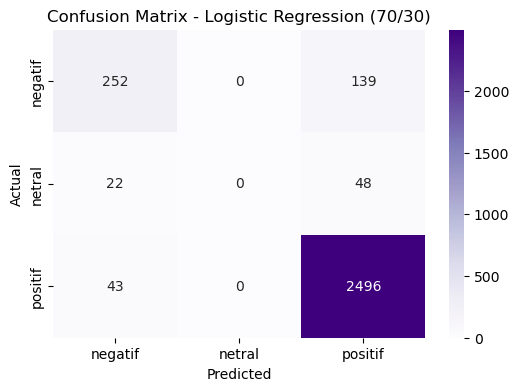

In [31]:
y_pred = log_model_70_30.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Logistic Regression: {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=log_model_70_30.classes_,
            yticklabels=log_model_70_30.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (70/30)")
plt.show()

**Melakukan Training Model SVM 80/20**

In [32]:
from sklearn.svm import SVC

In [33]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (80/20). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (80/20). Bentuk data latih: (8000, 4336)


In [34]:
svm_model_80_20 = SVC(kernel='linear', random_state=42)
svm_model_80_20.fit(X_train_tfidf, y_train)

print("Model SVM berhasil dilatih (80/20).")

Model SVM berhasil dilatih (80/20).


Akurasi SVM (80/20): 92.10%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.77      0.72      0.74       260
      netral       0.00      0.00      0.00        47
     positif       0.94      0.98      0.96      1693

    accuracy                           0.92      2000
   macro avg       0.57      0.56      0.57      2000
weighted avg       0.90      0.92      0.91      2000



c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


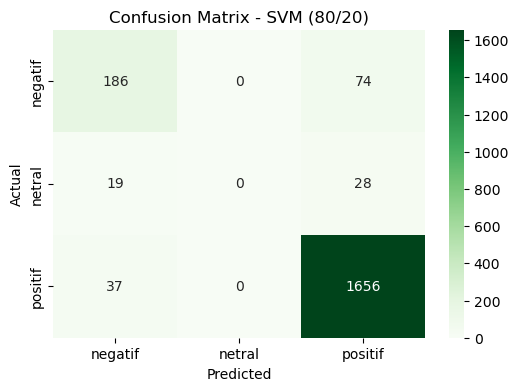

In [35]:
y_pred = svm_model_80_20.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (80/20): {accuracy*100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model_80_20.classes_,
            yticklabels=svm_model_80_20.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (80/20)")
plt.show()

**Melakukan Training Model SVM 70/30**

In [36]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (70/30). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (70/30). Bentuk data latih: (7000, 4053)


In [37]:
svm_model_70_30 = SVC(kernel='linear', random_state=42)
svm_model_70_30.fit(X_train_tfidf, y_train)

print("Model SVM berhasil dilatih (70/30).")

Model SVM berhasil dilatih (70/30).


Akurasi SVM (70/30): 92.17%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.77      0.72      0.74       391
      netral       0.00      0.00      0.00        70
     positif       0.94      0.98      0.96      2539

    accuracy                           0.92      3000
   macro avg       0.57      0.57      0.57      3000
weighted avg       0.90      0.92      0.91      3000



c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafsa\.conda\envs\main-ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


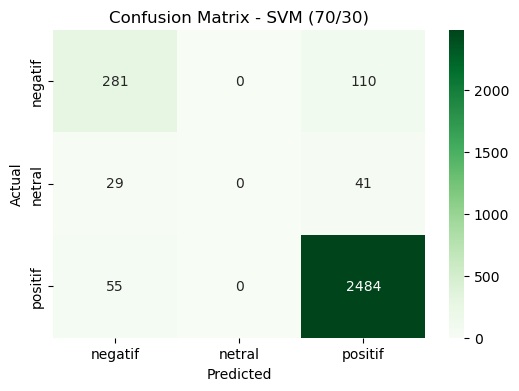

In [38]:
y_pred = svm_model_70_30.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (70/30): {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model_70_30.classes_,
            yticklabels=svm_model_70_30.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (70/30)")
plt.show()

**Melakukan Training Model Random Forest 80/20**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (80/20). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (80/20). Bentuk data latih: (8000, 4336)


In [41]:
rf_model_80_20 = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model_80_20.fit(X_train_tfidf, y_train)
print("Model Random Forest berhasil dilatih (80/20).")

Model Random Forest berhasil dilatih (80/20).


Akurasi Random Forest (80/20): 91.75%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.78      0.68      0.73       260
      netral       1.00      0.02      0.04        47
     positif       0.94      0.98      0.96      1693

    accuracy                           0.92      2000
   macro avg       0.90      0.56      0.58      2000
weighted avg       0.92      0.92      0.91      2000



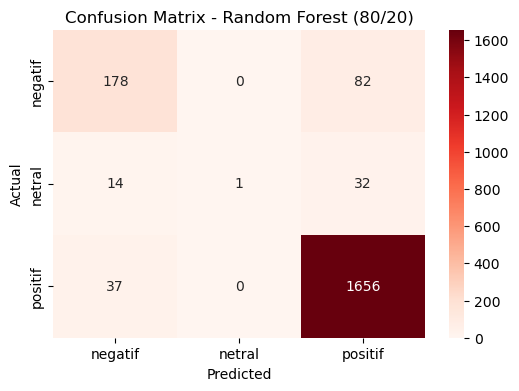

In [42]:
y_pred = rf_model_80_20.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest (80/20): {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=rf_model_80_20.classes_,
            yticklabels=rf_model_80_20.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (80/20)")
plt.show()

**Melakukan Training Model Random Forest 70/30**

In [43]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (70/30). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (70/30). Bentuk data latih: (7000, 4053)


In [44]:
rf_model_70_30 = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model_70_30.fit(X_train_tfidf, y_train)
print("Model Random Forest berhasil dilatih (70/30).")

Model Random Forest berhasil dilatih (70/30).


Akurasi Random Forest (70/30): 91.53%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.75      0.68      0.72       391
      netral       0.00      0.00      0.00        70
     positif       0.94      0.98      0.96      2539

    accuracy                           0.92      3000
   macro avg       0.56      0.55      0.56      3000
weighted avg       0.89      0.92      0.90      3000



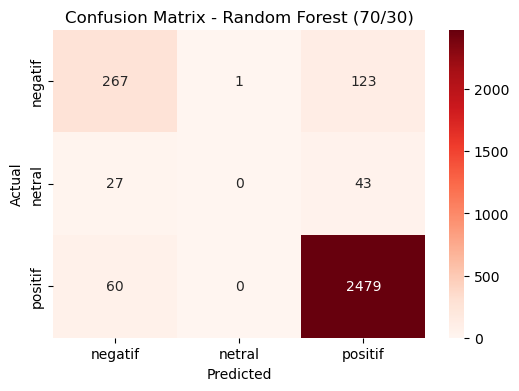

In [45]:
y_pred = rf_model_70_30.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest (70/30): {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=rf_model_70_30.classes_,
            yticklabels=rf_model_70_30.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (70/30)")
plt.show()

**Simpan Model**

In [ ]:
import joblib
#from google.colab import files

joblib.dump(log_model_80_20, 'log_model_80_20.pkl')
joblib.dump(log_model_70_30, 'log_model_70_30.pkl')

joblib.dump(svm_model_80_20, 'svm_model_80_20.pkl')
joblib.dump(svm_model_70_30, 'svm_model_70_30.pkl')

joblib.dump(rf_model_80_20, 'rf_model_80_20.pkl')
joblib.dump(rf_model_70_30, 'rf_model_70_30.pkl')

#Mendowload semua file
# files.download('log_model_80_20.pkl')
# files.download('log_model_70_30.pkl')
# files.download('svm_model_80_20.pkl')
# files.download('svm_model_70_30.pkl')
# files.download('rf_model_80_20.pkl')
# files.download('rf_model_70_30.pkl')

['rf_model_70_30.pkl']

In [47]:
%pip freeze > requirements.txt
print("File requirements.txt berhasil dibuat.")

Note: you may need to restart the kernel to use updated packages.
File requirements.txt berhasil dibuat.


In [ ]:
#from google.colab import files
#files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>